# 1. Explore

In [3]:
train_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

No Null values in trian or test.

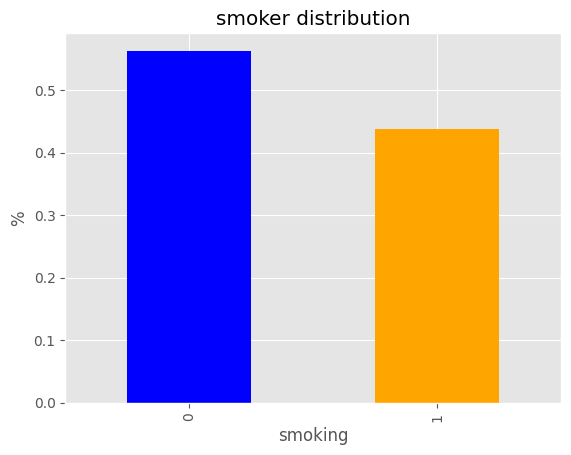

In [5]:
train_df["smoking"].value_counts(normalize = True).plot(kind = "bar", color = ['blue','orange'])
plt.ylabel('%')
plt.title('smoker distribution')
plt.show()

> 44% smokers, 56% Non-smokers. Data is pretty balanced.

In [6]:
def plotter(df,feature, target):
    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    sns.boxplot(ax = axes[0], data = df, x = target, y = feature)
    sns.kdeplot(data = df, x = feature, hue = target);  
    
    axes[0].set_title(f'{feature} boxplot by {target} status')
    axes[1].set_title(f'{feature} distribution by {target} status')
    fig.show()

### Age

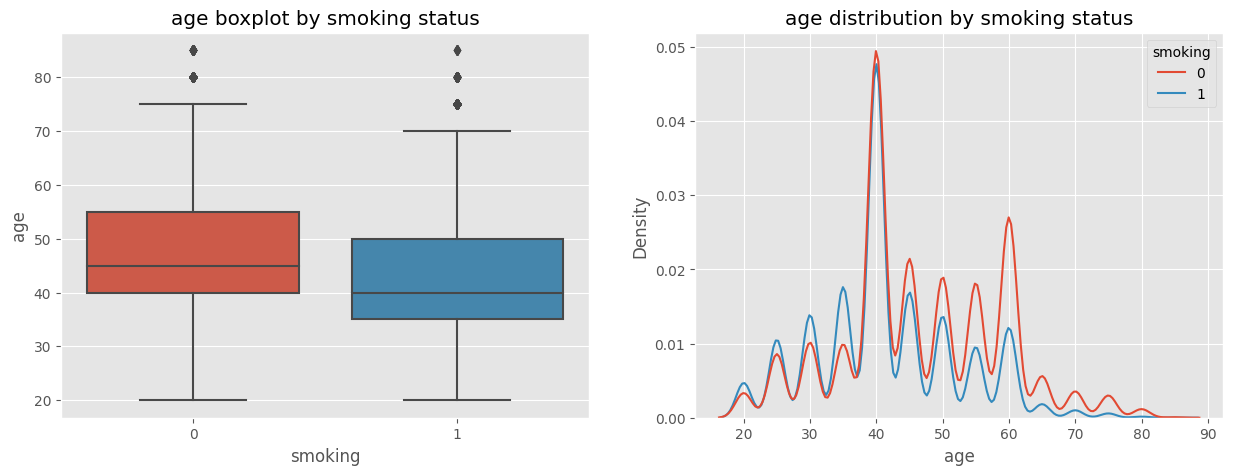

In [7]:
plotter(train_df, 'age', 'smoking')

From above:

* The medium age of smokers, on average, is five years less than that of non-smokers
* The right plot shows that this 5 year difference is equivalent to 1 bin

In [8]:
train_df.groupby("age")["age"].count()

age
20     3829
25     9140
30    11465
35    13081
40    46691
45    18480
49        1
50    15768
55    13446
58        2
60    19043
62        1
65     3637
69        1
70     2229
75     1760
80      644
85       38
Name: age, dtype: int64

Binning ages did not need to work exactly. This is seen with ages such as 49,58,62 etc


**TODO:**

> Clean the training and test data by rebinning the ages (DONE)

### Waist(cm)

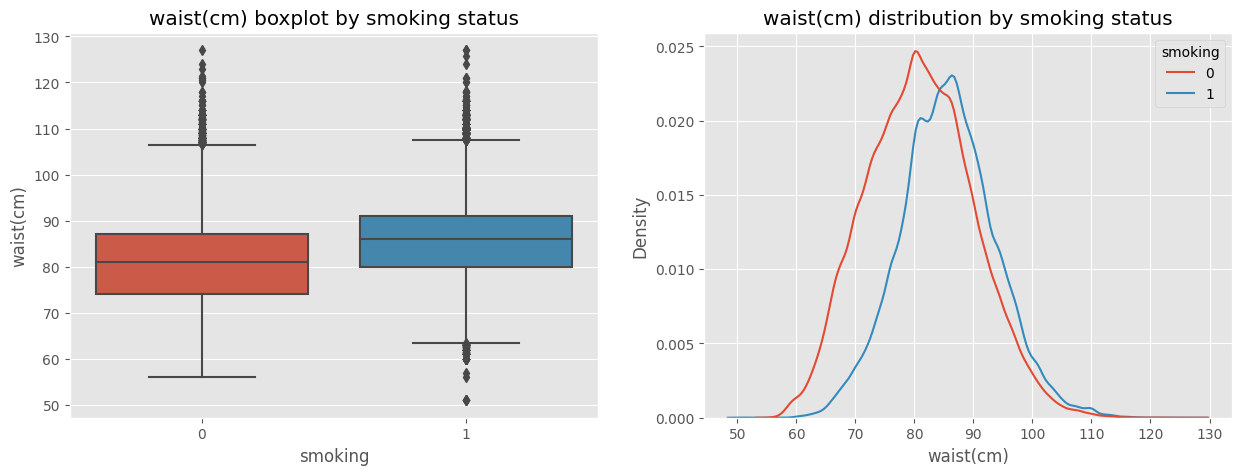

In [9]:
plotter(train_df, 'waist(cm)','smoking')

# 2. Pre-Processing

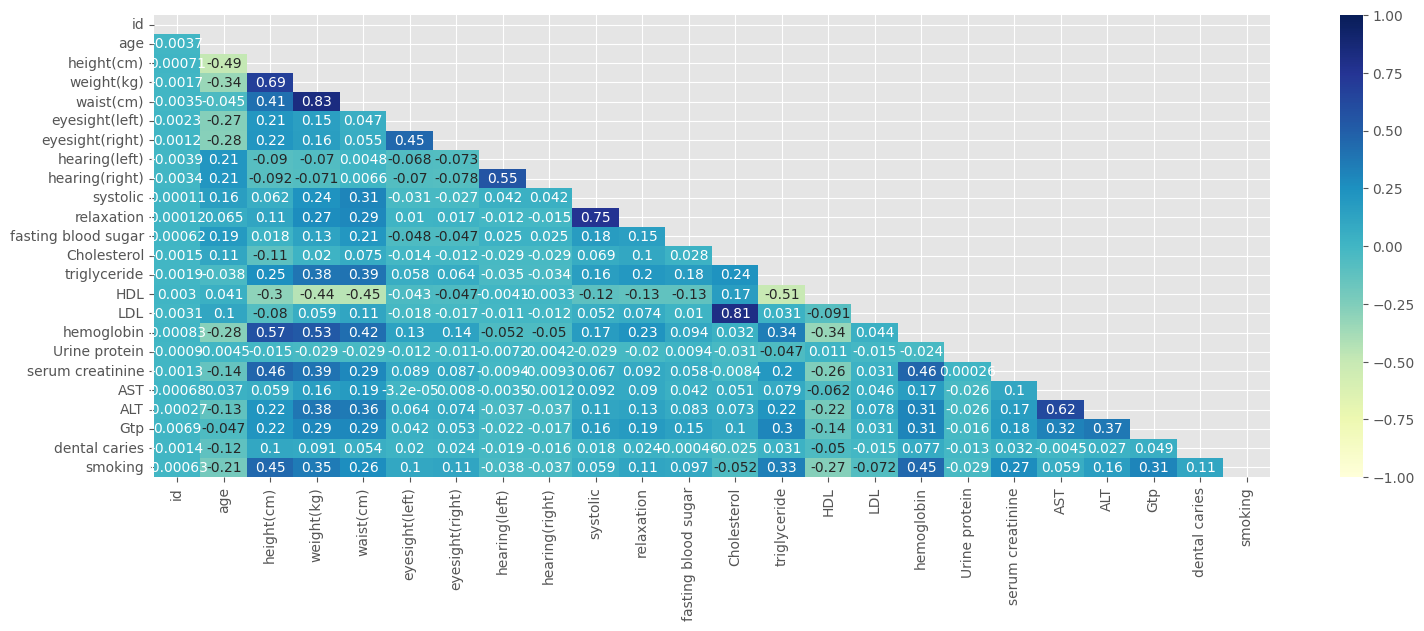

In [10]:
plt.figure(figsize=(18, 6))
mask = np.triu(np.ones_like(train_df.corr(), dtype=bool))
sns.heatmap(train_df.corr(),mask = mask, vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
plt.show()

In [11]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [12]:
def pre_process(data,training_cols):
    data.drop(columns=[col for col in data if col not in training_cols], inplace=True)
    
    data["bmi"] = data["weight(kg)"]/np.square(data["height(cm)"]/100)
    data["bmi"] = np.select([data['bmi'] < 18.5, data['bmi'] < 25, data['bmi'] < 30, data['bmi'] < 35, data['bmi'] < 35, data['bmi'] < 40], [0,1,2,3,4,5], 6)
    
    
    data["age"] = (data["age"]//5)*5

In [13]:
training_cols = [
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'smoking'
]

pre_process(train_df,training_cols)
train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking,bmi
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1.0,22,25,27,1,1
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1.1,27,23,37,0,1
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53,1,2
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1.0,20,27,30,0,2
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17,1,1


In [14]:
X, Y = train_df.drop(["smoking"],axis = 1),train_df["smoking"]

normalizer = MinMaxScaler()
normalizer.fit(X)
X = normalizer.transform(X)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=24)

# 3. Models

### Keras

In [15]:
input_shape = X_train.shape[1]
input_ = layers.Input(shape=(input_shape, ))
x1 = layers.Dense(64, activation="relu",kernel_initializer="he_normal")(input_)
x2 = layers.Dense(64, activation="relu",kernel_initializer="he_normal")(x1)
x3 = layers.Dense(64, activation="relu",kernel_initializer="he_normal")(x2)
output_ = layers.Dense(1, activation="sigmoid", kernel_initializer="glorot_normal")(x3)

model = keras.Model(inputs = input_, outputs=output_)

# 4. Train + Evaluation

Epoch 1/100
3982/3982 [==============================] - 22s 4ms/step - loss: 0.4921 - binary_accuracy: 0.7474 - val_loss: 0.4649 - val_binary_accuracy: 0.7668
Epoch 2/100
3982/3982 [==============================] - 16s 4ms/step - loss: 0.4736 - binary_accuracy: 0.7604 - val_loss: 0.4637 - val_binary_accuracy: 0.7654
Epoch 3/100
3982/3982 [==============================] - 16s 4ms/step - loss: 0.4701 - binary_accuracy: 0.7620 - val_loss: 0.4666 - val_binary_accuracy: 0.7650
Epoch 4/100
3982/3982 [==============================] - 16s 4ms/step - loss: 0.4674 - binary_accuracy: 0.7646 - val_loss: 0.4576 - val_binary_accuracy: 0.7702
Epoch 5/100
3982/3982 [==============================] - 16s 4ms/step - loss: 0.4650 - binary_accuracy: 0.7657 - val_loss: 0.4671 - val_binary_accuracy: 0.7612
Epoch 6/100
3982/3982 [==============================] - 16s 4ms/step - loss: 0.4633 - binary_accuracy: 0.7669 - val_loss: 0.4580 - val_binary_accuracy: 0.7695
Epoch 7/100
3982/3982 [=================

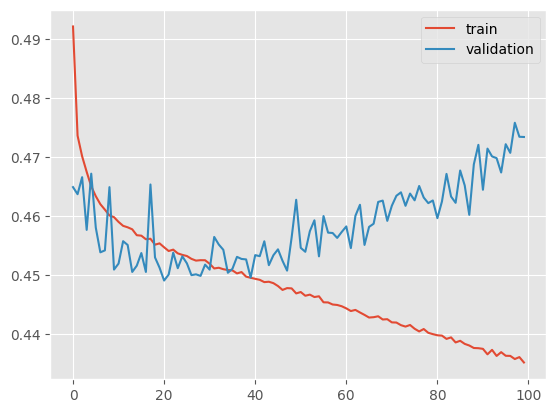

In [16]:
EPOCHS = 100
OPTIMISER = tf.keras.optimizers.Adam(learning_rate=1e-3)
LOSS = tf.keras.losses.BinaryCrossentropy()
METRICS = tf.keras.metrics.BinaryAccuracy()

model.compile(
    loss = LOSS, 
    optimizer= OPTIMISER,
    metrics= METRICS)


es = EarlyStopping(monitor='val_acc', mode='auto',patience = 20, restore_best_weights=True)

training = model.fit(
    X_train,
    Y_train,
    epochs = EPOCHS,
    validation_data = (X_val, Y_val),
    callbacks = [es]
)

plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [17]:
Y_prob = model.predict(X_val)
Y_prob = [item for row in Y_prob for item in row]

996/996 [==============================] - 2s 1ms/step


In [18]:
Y_preds = [0 if i <0.5 else 1 for i in Y_prob]

In [19]:
print(f"F1 Score: {f1_score(Y_val, Y_preds)}")
print(f"Accuracy: {accuracy_score(Y_val,Y_preds)}")
print(f"AUC: {roc_auc_score(Y_val, Y_preds)}")

F1 Score: 0.7556076330766656
Accuracy: 0.7708150194650257
AUC: 0.7748363686237438


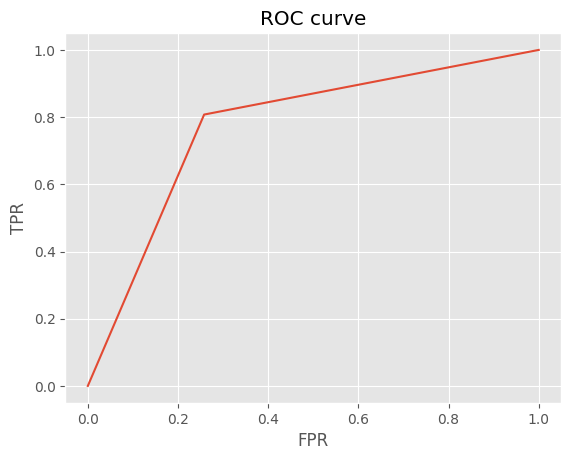

In [20]:
fpr,tpr,thresholds = roc_curve(Y_val,Y_preds)
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.show()

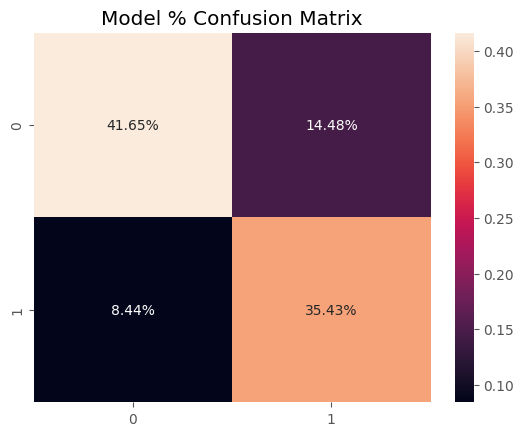

In [21]:
cm = confusion_matrix(Y_val,Y_preds)
sns.heatmap(cm/np.sum(cm),fmt = '.2%', annot = True)
plt.title("Model % Confusion Matrix")
plt.show()

# 5. Test pre-processing

In [22]:
pre_process(X_test,training_cols)
X_test = normalizer.fit_transform(X_test)

# 6. Submission

In [24]:
test_prediction_probability = model.predict(X_test)
test_prediction_probability = [item for row in test_prediction_probability for item in row]

3318/3318 [==============================] - 5s 1ms/step


In [25]:
submission['smoking'] = test_prediction_probability    
submission.head()

,id,smoking
0,159256,0.710436
1,159257,0.127941
2,159258,0.381953
3,159259,0.005009
4,159260,0.649433


In [26]:
submission.to_csv("submission.csv", index=None)